# Silhouette plot using silhouette_score
### source: https://www.youtube.com/watch?v=Qh7VxLsaU9M&t=224s

# <span style='background :yellow' > Auditory modality </span>

In [2]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import numpy as np
from pylab import rcParams
from matplotlib.ticker import FixedFormatter, FixedLocator
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/results/PreprocessedResults_101participants.csv')
df=df[['AudSD','AudSeq','AudBeat']]
# transform data into numpy array 
X=df.iloc[:,:].values
X.shape

(101, 3)

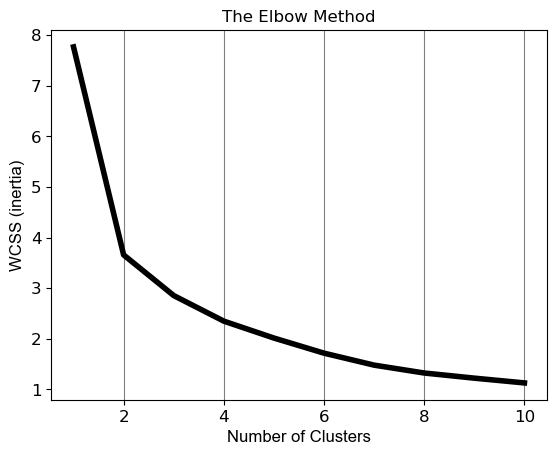

In [4]:
# Let's plot K Vs WCSS

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init = 10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,linewidth=4, color='black')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters',family='Arial', fontsize=12,color='black')
plt.ylabel('WCSS (inertia)', family='Arial', fontsize=12,color='black')
plt.xticks(fontsize=12,color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(which='both',color='black',axis='x',alpha=0.5)
# plt.axvline(x=number_of_clusters,linewidth=2,color='blue',linestyle='--') # define this after you check the elbow
plt.show()

In [5]:
silhouette_score(X,kmeans.labels_)


0.29081585553846545

In [6]:
kmeans_per_k=[KMeans(n_clusters=k, random_state=45).fit(X) for k in range(1,10)]
silhouette_scores=[silhouette_score(X,model.labels_)
                 for model in kmeans_per_k[1:]]
silhouette_scores

[0.43242701321056826,
 0.30413809789581675,
 0.22947262907354388,
 0.263167167523141,
 0.26684677662356326,
 0.2894273881814896,
 0.29841222262189776,
 0.29017061469653366]

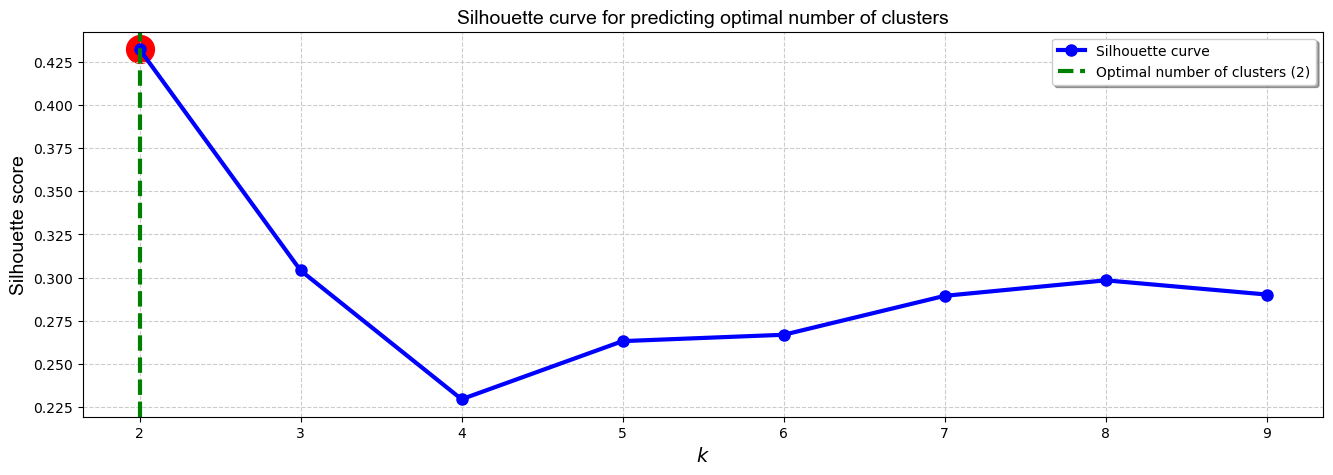

In [7]:
rcParams['figure.figsize']=16,5
plt.plot(range(2,10), silhouette_scores, 'bo-',color='blue',
           linewidth=3, markersize=8, label='Silhouette curve')
plt.xlabel('$k$', fontsize=14, family='Arial')
plt.ylabel('Silhouette score', fontsize=14, family='Arial')
plt.grid(which='major',color='#cccccc', linestyle='--')

plt.title('Silhouette curve for predicting optimal number of clusters', family='Arial',fontsize=14)
#calculate the optimal number of clusters
k=np.argmax(silhouette_scores)+2
plt.axvline(x=k, linestyle='--',c='green', linewidth=3,
           label='Optimal number of clusters ({})'.format(k))
plt.scatter(k,silhouette_scores[k-2], c='red',s=400)
plt.legend(shadow=True)
plt.show()

# Silhouette diagram

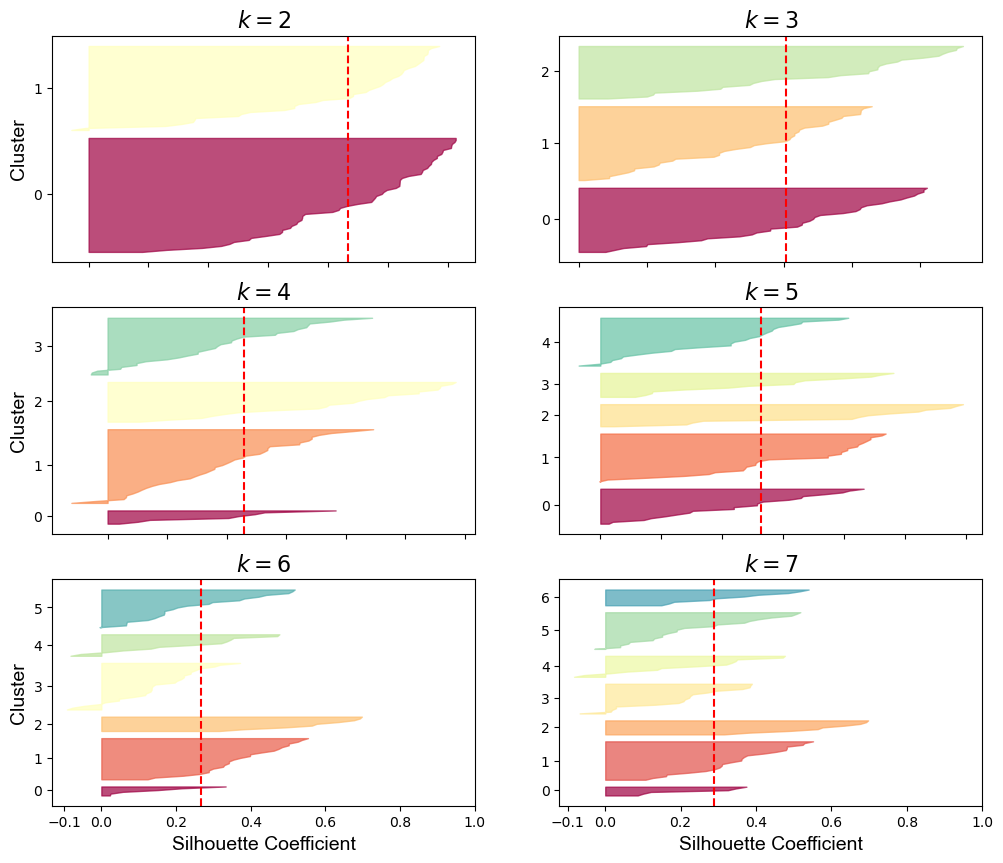

In [8]:
plt.figure(figsize=(12,10))
for k in (2,3,4,5,6,7):
    plt.subplot(3,2,k-1)
    y_pred=kmeans_per_k[k-1].labels_
    silhouette_coefficients=silhouette_samples(X,y_pred)
    padding = len(X)//30
    pos = padding
    ticks=[]
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = mpl.cm.Spectral(i/k)
        plt.fill_betweenx(np.arange(pos,pos + len(coeffs)), 0, coeffs,
                         facecolor = color, edgecolor = color, alpha = 0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2,4,6):
        plt.ylabel('Cluster', family='Arial', fontsize=14)
    if k in (6,7):
        plt.gca().set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
        plt.xlabel('Silhouette Coefficient', family = 'Arial', fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    plt.grid(False)
    plt.title('$k={}$'.format(k),fontsize=16)
    
## you can use the following lines to print the plot
plt.savefig("C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/plots/Silhouette_plot_Auditory.png", dpi=300, bbox_inches='tight')
plt.show()

# Silhouette diagram
### source: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

In [9]:
df=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/results/PreprocessedResults_101participants.csv')
df=df[['AudSD','AudSeq','AudBeat']]
# transform data into numpy array 
X=df.iloc[:,:].values
X.shape

(101, 3)

In [10]:
# Instantiate the KMeans models
km = KMeans(n_clusters=5, random_state=42)
# Fit the KMeans model
km.fit_predict(X)
# Calculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.270


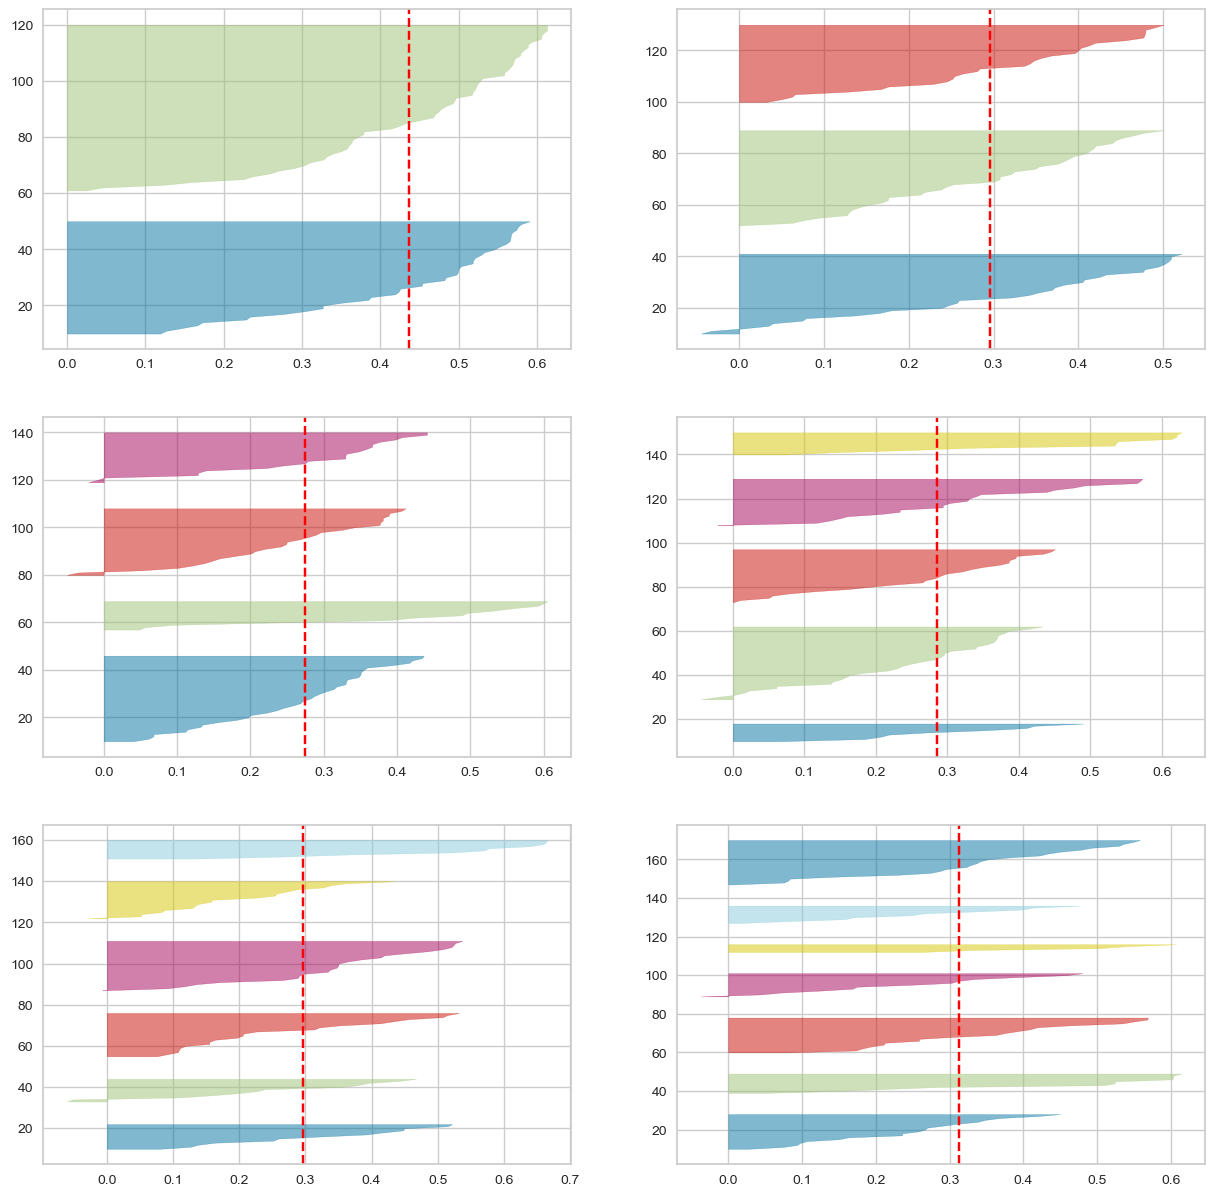

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,15))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

# <span style='background :yellow' > Visual modality </span>

In [11]:
df=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/results/PreprocessedResults_101participants.csv')
df=df[['VisSD','VisSeq','VisBeat']]
# transform data into numpy array 
X=df.iloc[:,:].values
X.shape

(101, 3)

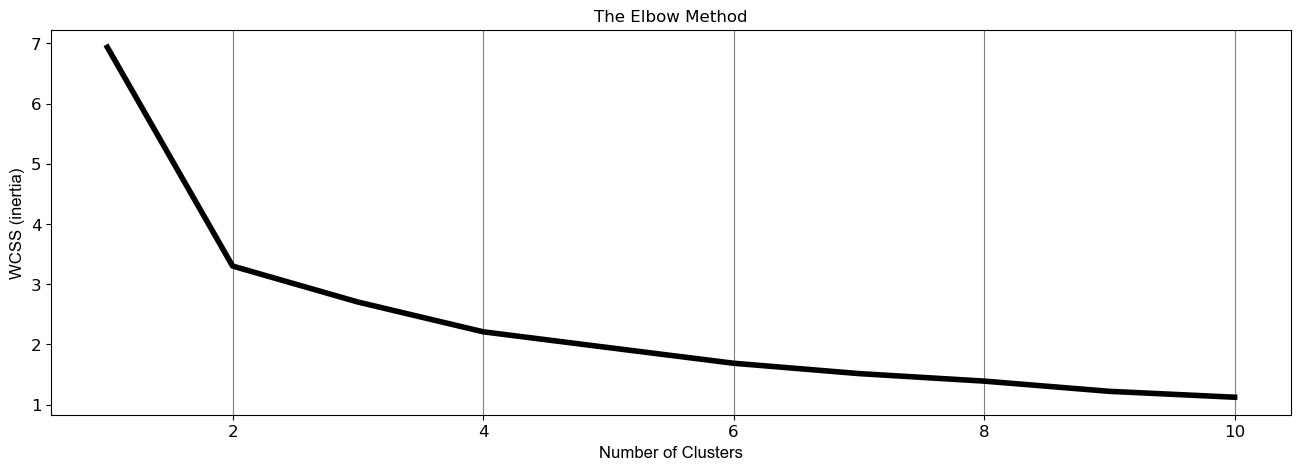

In [12]:
# Let's plot K Vs WCSS

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init = 10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,linewidth=4, color='black')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters',family='Arial', fontsize=12,color='black')
plt.ylabel('WCSS (inertia)', family='Arial', fontsize=12,color='black')
plt.xticks(fontsize=12,color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(which='both',color='black',axis='x',alpha=0.5)
# plt.axvline(x=number_of_clusters,linewidth=2,color='blue',linestyle='--') # define this after you check the elbow
plt.show()

In [13]:
silhouette_score(X,kmeans.labels_)


0.26342912518123496

In [14]:
kmeans_per_k=[KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1,10)]
silhouette_scores=[silhouette_score(X,model.labels_)
                 for model in kmeans_per_k[1:]]
silhouette_scores

[0.4512219050547023,
 0.303257262804213,
 0.27467794354373926,
 0.2667550095529533,
 0.25187734053108896,
 0.25780973676204094,
 0.26880962674305015,
 0.2639614136280409]

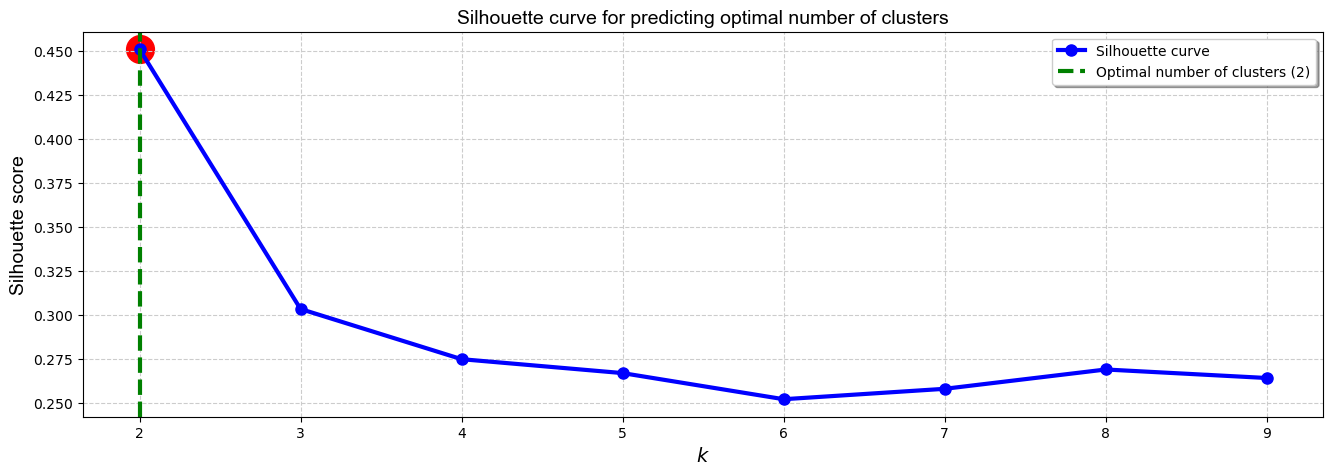

In [15]:
rcParams['figure.figsize']=16,5
plt.plot(range(2,10), silhouette_scores, 'bo-',color='blue',
           linewidth=3, markersize=8, label='Silhouette curve')
plt.xlabel('$k$', fontsize=14, family='Arial')
plt.ylabel('Silhouette score', fontsize=14, family='Arial')
plt.grid(which='major',color='#cccccc', linestyle='--')

plt.title('Silhouette curve for predicting optimal number of clusters', family='Arial',fontsize=14)
#calculate the optimal number of clusters
k=np.argmax(silhouette_scores)+2
plt.axvline(x=k, linestyle='--',c='green', linewidth=3,
           label='Optimal number of clusters ({})'.format(k))
plt.scatter(k,silhouette_scores[k-2], c='red',s=400)
plt.legend(shadow=True)
plt.show()

# Silhouette diagram

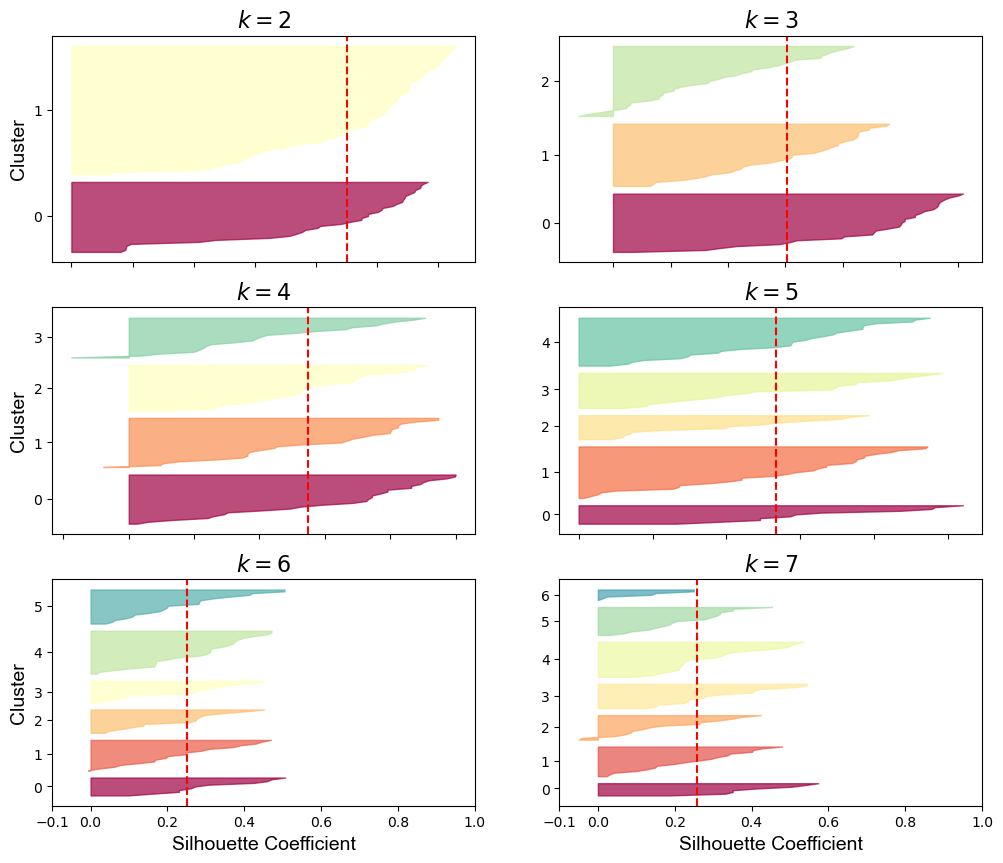

In [16]:
plt.figure(figsize=(12,10))
for k in (2,3,4,5,6,7):
    plt.subplot(3,2,k-1)
    y_pred=kmeans_per_k[k-1].labels_
    silhouette_coefficients=silhouette_samples(X,y_pred)
    padding = len(X)//30
    pos = padding
    ticks=[]
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = mpl.cm.Spectral(i/k)
        plt.fill_betweenx(np.arange(pos,pos + len(coeffs)), 0, coeffs,
                         facecolor = color, edgecolor = color, alpha = 0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2,4,6):
        plt.ylabel('Cluster', family='Arial', fontsize=14)
    if k in (6,7):
        plt.gca().set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
        plt.xlabel('Silhouette Coefficient', family = 'Arial', fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    plt.grid(False)
    plt.title('$k={}$'.format(k),fontsize=16)
#plt.savefig("seaborn_plot_visualOnline.png", dpi=300, bbox_inches='tight')

## you can use the following lines to print the plot
plt.savefig("C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/plots/Silhouette_plot_Visual.png", dpi=300, bbox_inches='tight')
plt.show()
plt.show()

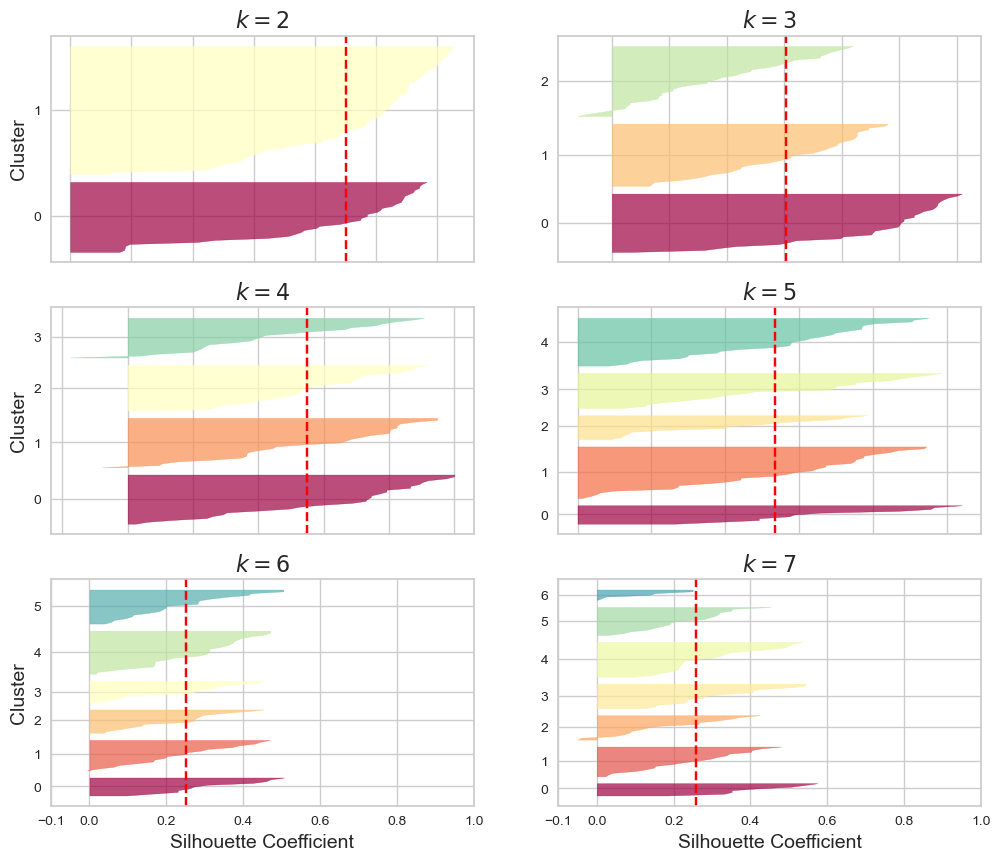

In [27]:
plt.figure(figsize=(12,10))
for k in (2,3,4,5,6,7):
    plt.subplot(3,2,k-1)
    y_pred=kmeans_per_k[k-1].labels_
    silhouette_coefficients=silhouette_samples(X,y_pred)
    padding = len(X)//30
    pos = padding
    ticks=[]
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = mpl.cm.Spectral(i/k)
        plt.fill_betweenx(np.arange(pos,pos + len(coeffs)), 0, coeffs,
                         facecolor = color, edgecolor = color, alpha = 0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2,4,6):
        plt.ylabel('Cluster', family='Arial', fontsize=14)
    if k in (6,7):
        plt.gca().set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
        plt.xlabel('Silhouette Coefficient', family = 'Arial', fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    plt.title('$k={}$'.format(k),fontsize=16)
    
plt.show()

# Silhouette diagram
### source: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

In [29]:
df=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/results/PreprocessedResults_101participants.csv')
df=df[['VisSD','VisSeq','VisBeat']]
# transform data into numpy array 
X=df.iloc[:,:].values
X.shape

(101, 3)

In [30]:
# Instantiate the KMeans models
km = KMeans(n_clusters=5, random_state=42)
# Fit the KMeans model
km.fit_predict(X)
# Calculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.267


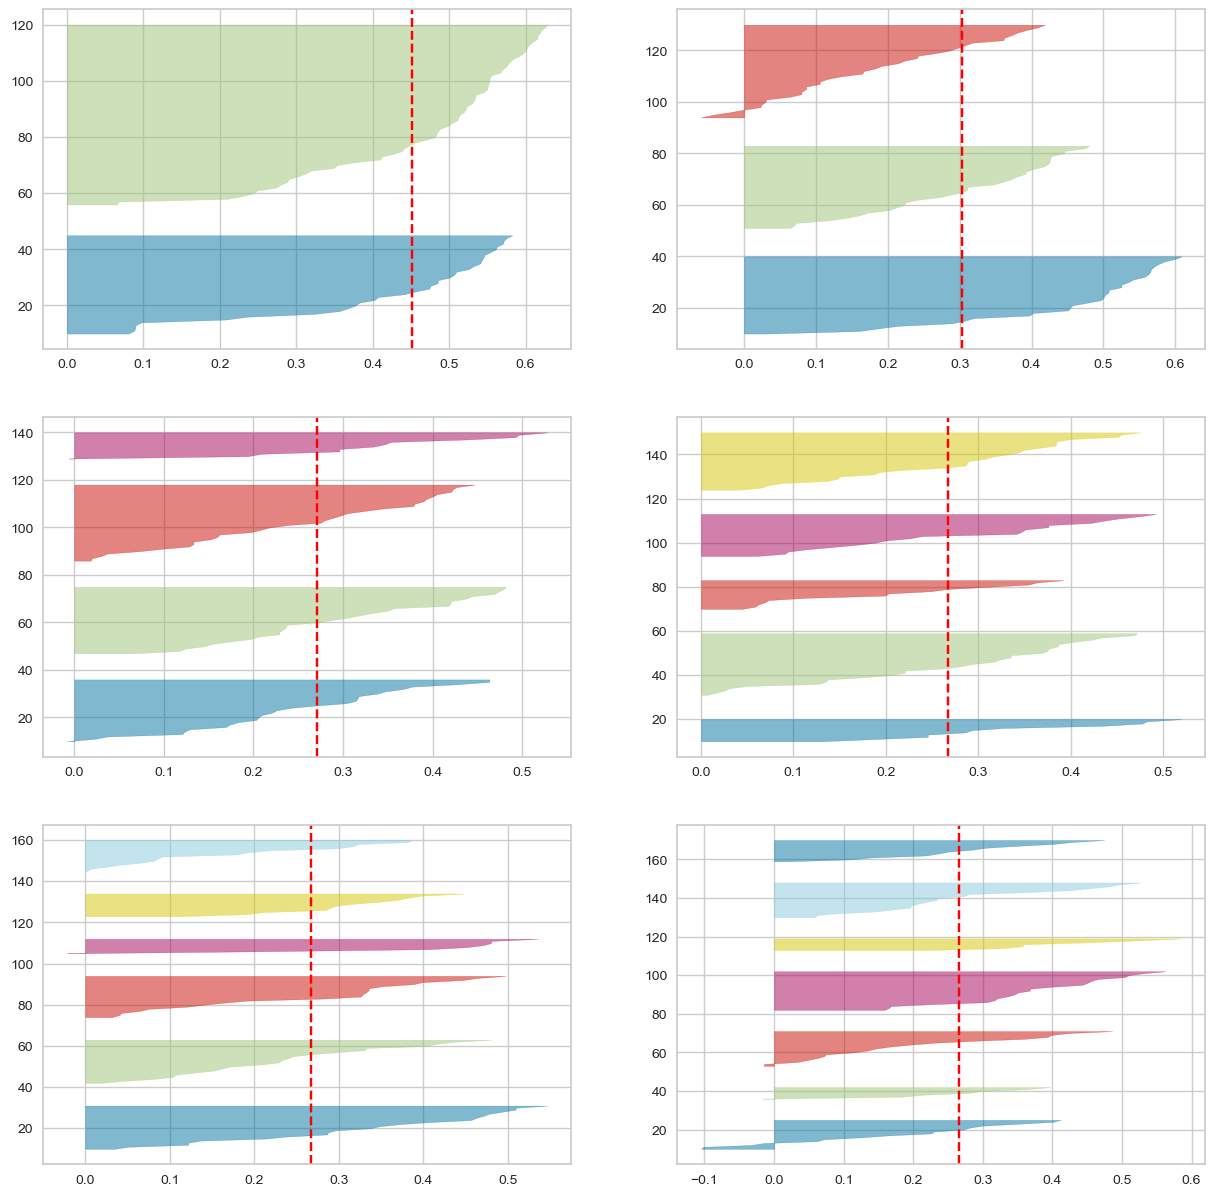

In [31]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,15))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)